# APIs Lab
In this lab we will practice using APIs to retrieve and store data.

In [8]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Get Data From Sheetsu

[Sheetsu](https://sheetsu.com/) is an online service that allows you to access any Google spreadsheet from an API. This can be a very handy way to share a dataset with colleagues as well as to create a mini centralized data storage, that is simpler to edit than a database.

A Google Spreadsheet with wine data can be found [here](https://docs.google.com/a/generalassemb.ly/spreadsheets/d/1JWRwDnwIMLgvPqNMdJLmAJgzvz0K3zAUc6jev3ci1c8/edit?usp=sharing).

You can access it through the Sheetsu API at this endpoint: https://sheetsu.com/apis/v1.0/cc9420722ae4. [Here](https://sheetsu.com/docs/beta) is Sheetsu's documentation.


Questions:

1. Use the requests library to access the document. Inspect the response text. What kind of data is it?
2. Check the status code of the response object. What code is it?
3. Use the appropriate libraries and read functions to read the response into a Pandas Dataframe
4. Once you've imported the data into a dataframe, check the value of the 5th line: what's the price?

In [11]:
url = 'https://sheetsu.com/apis/v1.0/cc9420722ae4'

response = requests.get(url)

In [12]:
print response.text

[{"Color":"W","Region":"Portugal","Country":"Portugal","Vintage":"2013","Vinyard":"Vinho Verde","Name":"","Grape":"","Consumed In":"2015","Score":"4","Price":""},{"Color":"W","Region":"France","Country":"France","Vintage":"2013","Vinyard":"Peyruchet","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"17.8"},{"Color":"W","Region":"Oregon","Country":"Oregon","Vintage":"2013","Vinyard":"Abacela","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"20"},{"Color":"W","Region":"Spain","Country":"Spain","Vintage":"2012","Vinyard":"Ochoa","Name":"","Grape":"chardonay","Consumed In":"2015","Score":"2.5","Price":"7"},{"Color":"R","Region":"","Country":"US","Vintage":"2012","Vinyard":"Heartland","Name":"Spice Trader","Grape":"chiraz, cab","Consumed In":"2015","Score":"3","Price":"6"},{"Color":"R","Region":"California","Country":"US","Vintage":"2012","Vinyard":"Crow Canyon","Name":"","Grape":"cab","Consumed In":"2015","Score":"3.5","Price":"13"},{"Color":"R","Region":"Oregon"

In [14]:
print response.status_code

200


In [17]:
jso_res = json.loads(response.text)

In [18]:
df = pd.DataFrame(jso_res)
df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


> Answers:
    1. A JSON string.
    2. 200
    3. Options inlucde: pd.read_json; json.loads + pd.Dataframe
    4. 5

### Exercise 2: Post Data to Sheetsu
Now that we've learned how to read data, it'd be great if we could also write data. For this we will need to use a _POST_ request.

1. Use the post command to add the following data to the spreadsheet:

In [19]:
post_data = {
'Grape' : ''
, 'Name' : 'My wonderful wine'
, 'Color' : 'R'
, 'Country' : 'US'
, 'Region' : 'Sonoma'
, 'Vinyard' : ''
, 'Score' : '10'
, 'Consumed In' : '2015'
, 'Vintage' : '1973'
, 'Price' : '200'
}

In [20]:
requests.post(url, data = post_data)

<Response [201]>

1. What status did you get? How can you check that you actually added the data correctly?
- In this exercise, your classmates are adding data to the same spreadsheet. What happens because of this? Is it a problem? How could you mitigate it?

In [21]:
a = requests.get(url)

In [22]:
a.text

u'[{"Color":"W","Region":"Portugal","Country":"Portugal","Vintage":"2013","Vinyard":"Vinho Verde","Name":"","Grape":"","Consumed In":"2015","Score":"4","Price":""},{"Color":"W","Region":"France","Country":"France","Vintage":"2013","Vinyard":"Peyruchet","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"17.8"},{"Color":"W","Region":"Oregon","Country":"Oregon","Vintage":"2013","Vinyard":"Abacela","Name":"","Grape":"","Consumed In":"2015","Score":"3","Price":"20"},{"Color":"W","Region":"Spain","Country":"Spain","Vintage":"2012","Vinyard":"Ochoa","Name":"","Grape":"chardonay","Consumed In":"2015","Score":"2.5","Price":"7"},{"Color":"R","Region":"","Country":"US","Vintage":"2012","Vinyard":"Heartland","Name":"Spice Trader","Grape":"chiraz, cab","Consumed In":"2015","Score":"3","Price":"6"},{"Color":"R","Region":"California","Country":"US","Vintage":"2012","Vinyard":"Crow Canyon","Name":"","Grape":"cab","Consumed In":"2015","Score":"3.5","Price":"13"},{"Color":"R","Region":"Orego

## Exercise 3: Data munging

Get back to the dataframe you've created in the beginning. Let's do some data munging:

1. Search for missing data
    - Is there any missing data? How do you deal with it?
    - Is there any data you can just remove?
    - Are the data types appropriate?
- Summarize the data 
    - Try using describe, min, max, mean, var

In [29]:
df.head(10)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,NaN,3,2012,Heartland
5,R,2015,US,cab,NaN,13,California,3.5,2012,Crow Canyon
6,R,2015,US,NaN,#14,21,Oregon,2.5,2013,Abacela
7,R,2015,France,"merlot, cab",NaN,12,Bordeaux,3.5,2012,David Beaulieu
8,R,2015,France,"merlot, cab",NaN,11.99,Medoc,3.5,2011,Chantemerle
9,R,2015,US,merlot,NaN,13,Washington,4,2011,Hyatt


In [24]:
df.shape

(61, 10)

In [25]:
df.replace('', np.nan, inplace = True)

In [26]:
df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,NaN,3,2012,Heartland


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
Color          61 non-null object
Consumed In    61 non-null object
Country        59 non-null object
Grape          18 non-null object
Name           52 non-null object
Price          55 non-null object
Region         60 non-null object
Score          60 non-null object
Vintage        61 non-null object
Vinyard        29 non-null object
dtypes: object(10)
memory usage: 4.8+ KB


In [33]:
df[['Price', 'Score']] = df[['Price', 'Score']].astype(float)

In [35]:
df.describe()

,Price,Score
count,55.00000,60.000000
mean,122.27800,6.891667
std,92.60378,3.372485
min,6.00000,2.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,200.00000,10.000000


## Exercise 4: Feature Extraction

We would like to use a regression tree to predict the score of a wine. In order to do that, we first need to select and engineer appropriate features.

- Set the target to be the Score column, drop the rows with no score
- Use pd.get_dummies to create dummy features for all the text columns
- Fill the nan values in the numerical columns, using an appropriate method
- Train a Decision tree regressor on the Score, using a train test split:
        X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
- Plot the test values, the predicted values and the residuals
- Calculate R^2 score
- Discuss your findings


In [36]:
df1 = df[~df['Score'].isnull()]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 60
Data columns (total 10 columns):
Color          60 non-null object
Consumed In    60 non-null object
Country        58 non-null object
Grape          18 non-null object
Name           51 non-null object
Price          55 non-null float64
Region         59 non-null object
Score          60 non-null float64
Vintage        60 non-null object
Vinyard        28 non-null object
dtypes: float64(2), object(8)
memory usage: 5.2+ KB


In [37]:
y = df1['Score']

In [38]:
df1.head() 

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4.0,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.8,France,3.0,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20.0,Oregon,3.0,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7.0,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6.0,NaN,3.0,2012,Heartland


In [40]:
num = ['Consumed In', 'Price', 'Vintage']
dum = [c for c in df1.columns if c not in num + ['Score']]

In [49]:
med = df1[num].median()

In [50]:
df1['Consumed In'] = df1['Consumed In'].apply(lambda x: x if x > 0 else med[0])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
df1.loc[:,'Price'] = df1['Price'].apply(lambda x: x if x> 0 else med[1])
df1.loc[:,'Vintage'] = df1['Vintage'].apply(lambda x: x if x> 0 else med[2])

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
df1.head(20)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,200.00,Portugal,4.0,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.80,France,3.0,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20.00,Oregon,3.0,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7.00,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6.00,NaN,3.0,2012,Heartland
5,R,2015,US,cab,NaN,13.00,California,3.5,2012,Crow Canyon
6,R,2015,US,NaN,#14,21.00,Oregon,2.5,2013,Abacela
7,R,2015,France,"merlot, cab",NaN,12.00,Bordeaux,3.5,2012,David Beaulieu
8,R,2015,France,"merlot, cab",NaN,11.99,Medoc,3.5,2011,Chantemerle
9,R,2015,US,merlot,NaN,13.00,Washington,4.0,2011,Hyatt


In [54]:
df1['Color'].value_counts()

R    46
W    13
P     1
Name: Color, dtype: int64

In [72]:
X = df1[num].join(pd.get_dummies(df1[dum], drop_first=True))
X.head()

,Consumed In,Price,Vintage,Color_R,Color_W,Country_Italy,Country_Oregon,Country_Portugal,Country_Spain,Country_US,...,Vinyard_Orizzonti,Vinyard_Peyruchet,Vinyard_Provenance,Vinyard_Puech-Haut,Vinyard_Ridolfi,Vinyard_Rosso Dei Poggi,Vinyard_Truro Vineyards,Vinyard_Two Angels,Vinyard_Vaillons,Vinyard_Vinho Verde
0,2015,200.0,2013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2015,17.8,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,20.0,2013,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,7.0,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,6.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Dropping columns

del X['Color_R']
del X['Country_US']
del X['Grape_pinot noir']
del X['Name_Meiomi']
del X['Region_Napa']
del X['Vinyard_Belle Glos']

In [73]:
X['Intercept'] = 1.

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline

In [74]:
dt = make_pipeline(Imputer(), DecisionTreeRegressor())

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [76]:
dt.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))])

In [77]:
pred = dt.predict(X_test)

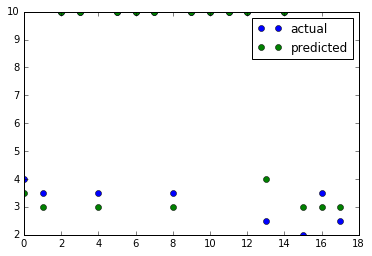

In [78]:
plt.plot(y_test.values, 'o')
plt.plot(pred, 'o')
plt.legend(['actual', 'predicted'])

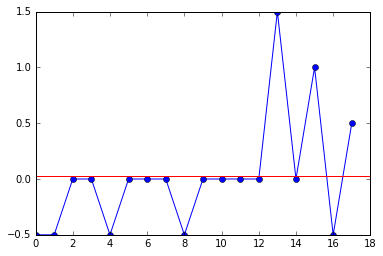

In [79]:
resid = pred - y_test.values
plt.plot(resid, 'o-')
plt.axhline(resid.mean(), color = 'r')

In [80]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.97774596564289429

## Exercise 5: IMDB Movies

Sometimes an API doesn't provide all the information we would like to get and we need to be creative.
Here we will use a combination of scraping and API calls to investigate the ratings and gross earnings of famous movies.

## 5.a Get top movies

The Internet Movie Database contains data about movies. Unfortunately it does not have a public API.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies. You can parse it with regular expression or using a library like `BeautifulSoup`.

**Hint:** movie_ids look like this: `tt2582802`

In [83]:
url = 'http://www.imdb.com/chart/top'

def get_top250():
    responses = requests.get(url)
    txt = responses.text
    entry = re.findall("<a href.*?/title/(.*?)/", txt)
    return list(set(entry))

In [87]:
top_movies = get_top250()

In [88]:
top_movies

[u'tt2582802',
 u'tt0047478',
 u'tt0082971',
 u'tt0050212',
 u'tt0848228',
 u'tt1663202',
 u'tt0338564',
 u'tt0046268',
 u'tt0055630',
 u'tt0266543',
 u'tt0042192',
 u'tt0198781',
 u'tt1979320',
 u'tt0405159',
 u'tt0057115',
 u'tt0253474',
 u'tt0071315',
 u'tt0114746',
 u'tt0363163',
 u'tt0119217',
 u'tt1865505',
 u'tt0074896',
 u'tt1895587',
 u'tt0347149',
 u'tt0021749',
 u'tt0119488',
 u'tt1187043',
 u'tt0053125',
 u'tt0268978',
 u'tt0112471',
 u'tt2084970',
 u'tt1220719',
 u'tt0025316',
 u'tt2015381',
 u'tt0118849',
 u'tt0083922',
 u'tt0088247',
 u'tt0468569',
 u'tt0087843',
 u'tt0072684',
 u'tt2024544',
 u'tt0074958',
 u'tt0325980',
 u'tt0052618',
 u'tt0364569',
 u'tt0081398',
 u'tt0036775',
 u'tt0120382',
 u'tt0110357',
 u'tt0079470',
 u'tt0071853',
 u'tt0095765',
 u'tt0075148',
 u'tt0978762',
 u'tt1255953',
 u'tt0036868',
 u'tt0080678',
 u'tt0093779',
 u'tt0108052',
 u'tt0056592',
 u'tt0088763',
 u'tt0095327',
 u'tt0482571',
 u'tt0053291',
 u'tt0245712',
 u'tt0407887',
 u'tt00447

## 5.b Get top movies data

Although the Internet Movie Database does not have a public API, an open API exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies you have extracted in the previous step.
- Check the documentation of omdbapi.com to learn how to request movie data by id
- Define a function that returns a python object with all the information for a given id
- Iterate on all the IDs and store the results in a list of such objects
- Create a Pandas Dataframe from the list

In [89]:
def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [90]:
entries_dict_list = [get_entry(e) for e in top_movies]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [91]:
df = pd.DataFrame(entries_dict_list)

In [92]:
df.head(3)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,15 Oct 2014,True,107 min,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,"413,720"
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,19 Nov 1956,True,207 min,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,"232,249"
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,12 Jun 1981,True,115 min,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,"671,034"


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


## 5.c Get gross data

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. We'll revert back to scraping for this.

- Write a function that retrieves the gross revenue from the entry page at imdb.com
- The function should handle the exception of when the page doesn't report gross revenue
- Retrieve the gross revenue for each movie and store it in a separate dataframe

In [95]:
def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/'+entry)
    html = response.text
    try:
        gross_list = re.findall("Gross:</h4>[ ]*\$([^ ]*)", html)
        gross = int(gross_list[0].replace(',', ''))
        print '.',
        return gross
    except Exception as ex:
        print
        print ex, entry, response.status_code
        return None

In [97]:
grosses = [(e, get_gross(e)) for e in top_movies]

. . . . . . .
list index out of range tt0046268 200

list index out of range tt0055630 200
. . . . .
list index out of range tt0057115 200
.
list index out of range tt0071315 200
. . . .
list index out of range tt0074896 200
. .
list index out of range tt0021749 200
. .
list index out of range tt0053125 200
. . .
list index out of range tt1220719 200

list index out of range tt0025316 200
. .
list index out of range tt0083922 200
. . .
list index out of range tt0072684 200
.
list index out of range tt0074958 200
. . . .
list index out of range tt0036775 200
. . . . . .
list index out of range tt0978762 200
. .
list index out of range tt0080678 200
. .
list index out of range tt0056592 200
.
list index out of range tt0095327 200
. . . . . . . . .
list index out of range tt0046438 200
.
list index out of range tt0015864 200
.
list index out of range tt0045152 200
. . . .
list index out of range tt0046911 200
.
list index out of range tt0050986 200
.
list index out of range tt0091251 200


In [98]:
df1 = pd.DataFrame(grosses, columns=['imdbID', 'Gross'])
df1.head()

,imdbID,Gross
0,tt2582802,13092000.0
1,tt0047478,269061.0
2,tt0082971,242374454.0
3,tt0050212,27200000.0
4,tt0848228,623279547.0


## 5.d Data munging

- Now that you have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

In [99]:
df = df.replace('N/A', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     169 non-null object
Plot          250 non-null object
Poster        247 non-null object
Rated         249 non-null object
Released      249 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [100]:
df.Released = pd.to_datetime(df.Released)

In [101]:
def intminutes(x):
    y = x.replace('min', '').strip()
    return int(y)

df.Runtime = df.Runtime.apply(intminutes)

In [102]:
df.Year = df.Year.astype(int)

In [103]:
df.imdbRating = df.imdbRating.astype(float)

In [104]:
def intvotes(x):
    y = x.replace(',', '').strip()
    return int(y)
df.imdbVotes = df.imdbVotes.apply(intvotes)

In [105]:
df = pd.merge(df, df1)
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes,Gross
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,...,True,107,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,413720,13092000.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,...,True,207,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,232249,269061.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,115,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,671034,242374454.0
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",NaN,After settling his differences with a Japanese...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,161,The Bridge on the River Kwai,movie,"Pierre Boulle (novel), Carl Foreman (screenpla...",1957,tt0050212,8.2,151604,27200000.0
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,Joss Whedon,"Action, Sci-Fi, Thriller","English, Russian",69,Earth's mightiest heroes must come together an...,https://images-na.ssl-images-amazon.com/images...,PG-13,...,True,143,The Avengers,movie,"Joss Whedon (screenplay), Zak Penn (story), Jo...",2012,tt0848228,8.1,1010033,623279547.0


## 5.d Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

Append these columns to the merged dataframe.

**Hint:** In order to get the actors name right, you'll have to set the `token_pattern` parameter in `CountVectorizer` to u'(?u)\\w+\.?\\w?\.? \\w+'. Can you see why? How does this differ from the default?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
data = cv.fit_transform(df.Genre).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genredf = pd.DataFrame(data, columns=columns)
genredf.head()

## Bonus:

- What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?
